In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from helpers.texts import *

### Loading datasets

In [32]:
tennis_questions = pd.read_csv('test_datasets\questions.tsv.gz', sep='\t', compression='gzip').dropna()
display(tennis_questions.sample(5))

big_bang_theory = pd.read_csv('test_datasets/big_bang_theory.csv').dropna()
display(big_bang_theory.sample(5))

,questions,ranking,similarity,gender
2334,going stadium --ENT-- --ENT--,326,0.520357,M
1724,ask advice play --PRON--,171,0.682015,M
698,feeling,440,0.719098,F
270,fault,175,0.585344,F
384,--ENT-- years feel like --ENT-- reach,908,0.796487,F


,season,episode,scene,character,text,id,formatted_text,number of words
14362,4,4,A corridor at the university,Sheldon,Yes.,S04E04,yes,2
13940,4,2,The Cheesecake Factory,Penny,"Sheldon, I’m not waiting on you.",S04E02,sheldon i m not waiting on you,9
33346,8,2,Mrs Davis’ office,Sheldon,Thank you. I assume you’d like to reopen our d...,S08E02,thank you i assume you d like to reopen our d...,23
35941,8,14,Penny’s apartment,Bernadette,"Okay, I learned my lesson. Making fun of peopl...",S08E14,okay i learned my lesson making fun of peopl...,14
14280,4,4,The university cafeteria,Leonard,"Okay. Well, how about this? Kidnap Bernadette ...",S04E04,okay well how about this kidnap bernadette ...,26


### Binary classification

In this first example, we show how to use the helper functions to perform binary classification (i.e. predicting labels than can only take two values, here either "M" or "F").

In [29]:
tp, fp, fn, tn = binary_classify_based_on_text(
    df=tennis_questions,
    text_col_name='questions',
    label_col_name='gender',
)

accuracy = (tp + tn) / (tp + tn + fp + fn)

print(f"The accuracy of the model for predicting the gender based on the question is: {accuracy:.2%}")
print(f"Number of estimations made: {tp + tn + fp + fn}")

The accuracy of the model for predicting the gender based on the question is: 71.25%
Number of estimations made: 1200


### Regression

In this second example, we show how to use the helper functions to perform regression (i.e. predicting a continuous variable).

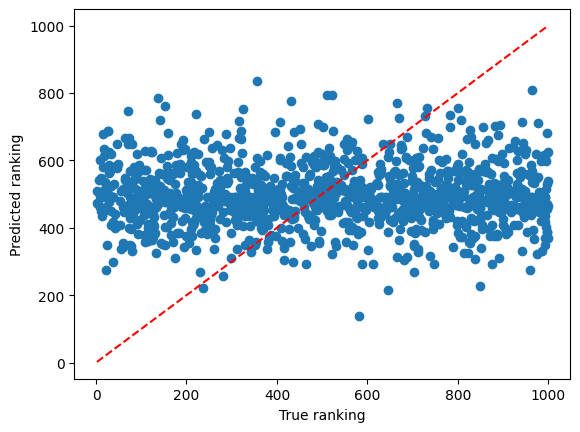

In [30]:
y_true, y_pred = regression_based_on_text(
    df=tennis_questions,
    text_col_name='questions',
    label_col_name='ranking',
)
plt.scatter(y_true, y_pred)
plt.plot([np.min(y_true), np.max(y_true)], [np.min(y_true), np.max(y_true)], 'r--')
plt.xlabel('True ranking')
plt.ylabel('Predicted ranking')
plt.show()

### Multi-class classification

In this third example, we show how to use the helper functions to perform multi-class classification (i.e. predicting labels than can take more than two values, here one class for each character of the TV show "Big Bang Theory").

In [31]:
cm, classes = classify_based_on_text(
    df=big_bang_theory,
    text_col_name='formatted_text',
    label_col_name='character',
)

sns.heatmap(cm, annot=True, fmt='d', xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

ValueError: np.nan is an invalid document, expected byte or unicode string.